# **CUSTOMER SEGMENTATION AND PREDICTION**

---



# 📘 Table of Contents

- [Introduction](#introduction)
  - [Problem Statement](#problem-statement)
  - [Project Objectives](#project-objectives)

- [Data Exploration & Preprocessing](#data-exploration--preprocessing)
  - [Dataset Overview and Summary Statistics](#dataset-overview-and-summary-statistics)
  - [Dataset Snapshot](#dataset-snapshot)
  - [Key Features & Data Types](#key-features--data-types)
  - [Summary Statistics](#summary-statistics)
  - [Data Quality Checks](#data-quality-checks)
  - [Import Libraries & Setup](#import-libraries--setup)
  - [Read Dataset](#read-dataset)
  - [Dataset Basic Info](#dataset-basic-info)
  - [Sanity Check Data](#sanity-check-data)
  - [Missing Values Analysis](#missing-values-analysis)
  - [Finding Duplicates](#finding-duplicates)
  - [Identifying Garbage Values](#identifying-garbage-values)
  - [Descriptive Statistics](#descriptive-statistics)
  - [Outlier Detection & Treatment](#outlier-detection--treatment)
  - [Boxplots and Distribution Plots](#boxplots-and-distribution-plots)
  - [IQR-based Outlier Removal](#iqr-based-outlier-removal)

- [ Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
  - [Top Selling Products](#top-selling-products)
  - [Monthly Sale Trend](#monthly-sale-trend)
  - [Purchase Pattern by Month](#purchase-pattern-by-month)
  - [Country Wise Order Distribution](#country-wise-order-distribution)

- [Feature Engineering & Customer Profiling](#feature-engineering--customer-profiling)
  - [Customer Segmentation Features](#customer-segmentation-features)
  - [Interpretation of Engineered Features](#interpretation-of-engineered-features)
  - [Top Customers by Monetary](#top-customers-by-monetary)
  - [Customer Feature Explanation](#customer-feature-explanation)

- [Visual Analysis & Segmentation](#visual-analysis--segmentation)
  - [Cluster Analysis Visuals](#cluster-analysis-visuals)
  - [Customer Segmentation Interpretation](#customer-segmentation-interpretation)

- [Clustering & Model Building](#clustering--model-building)
  - [Standard Scaler](#standard-scaler)
  - [PCA for Dimensionality Reduction](#pca-for-dimensionality-reduction)
  - [K-Means Clustering](#k-means-clustering)
  - [Hierarchical Clustering](#hierarchical-clustering)
  - [DBSCAN](#dbscan)
  - [Clustering Evaluation Summary](#clustering-evaluation-summary)
  - [Final Verdict](#final-verdict)

- [Final Insights & Business Strategy](#final-insights--business-strategy)
  - [Cluster Distribution Plot](#cluster-distribution-plot)
  - [Boxplots for Key Features by Cluster](#boxplots-for-key-features-by-cluster)
  - [Heatmap of Feature Means per Cluster](#heatmap-of-feature-means-per-cluster)
  - [Strategic Interpretation of Clusters](#strategic-interpretation-of-clusters)
  - [Predictive Modeling Opportunities](#predictive-modeling-opportunities)
  - [Strategic Business Applications](#strategic-business-applications)
- [Business Value & Conclusion](#business-value--conclusion)
- [Saving Outputs](#saving-outputs)
  - [Downloading Processed Features](#downloading-processed-features)
  - [Saving the KMeans Model](#saving-the-kmeans-model)



### 📌 **Problem Statement**

***The project focuses on understanding customer behavior from an online retail dataset. It aims to segment customers based on their purchasing patterns using clustering techniques. This enables the business to tailor marketing strategies, personalize offerings, and improve customer retention by identifying distinct groups such as high-value customers, frequent shoppers, or churn risks***.







###  **Project Objectives**

***This project aims to support an e-commerce business in gaining a deeper understanding of its customer base through data-driven segmentation. By applying RFM (Recency, Frequency, Monetary) analysis and clustering techniques, we group customers according to their purchasing behavior. These segments provide a foundation for more personalized marketing, improved customer engagement, and data-backed decision-making.***

##  **Dataset Overview and Summary Statistics**

####  **Dataset Snapshot**
- **Total entries (rows):** 541,909  
- **Columns (features):** Includes `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, `Country`

####  **Key Features & Data Types**

| Feature      | Description                          | Data Type  |
|--------------|--------------------------------------|------------|
| InvoiceNo    | Transaction identifier               | string     |
| StockCode    | Product identifier                   | string     |
| Description  | Item description                     | string     |
| Quantity     | Number of units purchased            | integer    |
| InvoiceDate  | Date of transaction                  | datetime   |
| UnitPrice    | Price per unit in GBP                | float      |
| CustomerID   | Unique customer identifier           | float/int  |
| Country      | Customer’s country                   | string     |





####  **Summary Statistics**

 Quantity
- Mean: ~9.55 items per order  
- Min: -80,995 *(likely returns or data entry issues)*  
- Max: 80,995  
- Std Dev: ~218 *(high variability)*

*UnitPrice
- Mean: £4.61  
- 75% of products priced under £4.13  
- Max: £38,970 *(possible outlier)*

#### **Data Quality Checks**
- **Missing Values:** Notably in `Description` and `CustomerID`
- **Garbage Values:**  
  - `'Missing'` in `Description`  
  - `'Unspecified'` in `Country`
- **Duplicates:** Found and removed as part of the cleaning process

# **Import Libraries & Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Optional: Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# **Read Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data(in).csv', encoding='latin-1')
# or 'cp1252', or any encoding you think the file might be using.

# **Dataset Basic Info**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Displays the first 5 rows of the dataset to get an initial look at the structure, column names, and sample values.

In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


To inspect the last 5 rows of the dataset. Helps ensure there are no odd or corrupted values at the bottom (e.g., blank rows, footer notes).

In [ ]:
df.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


This helps understand the distribution of non-numeric columns, which is useful for checking data quality (e.g., typos or inconsistencies in country names).

# **Sanity Check data**

In [ ]:
df.shape

(541909, 8)

Helps gauge the dataset size and informs us how much data we’re working with. For customer segmentation, more rows typically allow better cluster formation.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Find the Missing Value**

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# **Percentage of Missing Value**

In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


Calculates the percentage of missing values per column. More actionable than just count.

# **Finding Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(5268)

Identifies duplicate rows in the dataset. Duplicates can skew clustering and EDA by inflating certain patterns.



# **Identifying Garbage Value**

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print('***'*10)

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
581483        1
581566        1
C581499       1
C536383       1
C536379       1
Name: count, Length: 25900, dtype: int64
******************************
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85179a       1
23617        1
90214U       1
47591b       1
72802c       1
Name: count, Length: 4070, dtype: int64
******************************
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ANT SILVER TURQUOISE BOUDICCA RING       1
Damages                                  1
Found by jackie                          1
water damaged                            1
lost in space                            1
Name: count

### **Exploring Categorical Data Distributions**
Sample Output:

InvoiceNo: Most invoices are unique, but some have multiple rows—indicating bulk orders or transactions with many items.

StockCode: A few products are bestsellers (e.g., 85123A), while many have just 1 sale—suggesting a long tail of niche items.

Description: Top items include popular gift items like "WHITE HANGING HEART T-LIGHT HOLDER". Rare items may indicate experimental or seasonal stock.

InvoiceDate: Duplicate timestamps reflect high-volume order times, possibly during holidays or sales.

Country: Highly imbalanced distribution. United Kingdom dominates the dataset (~95% of rows). Other countries have significantly fewer records.

# **Summary statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Quantity and UnitPrice both have negative values, which are not valid for actual transactions and likely indicate:

Returns or cancellations (if not already removed)

Data entry issues

Quantity ranges from -80,995 to 80,995 with a high standard deviation → suggests extreme outliers.

UnitPrice has an unusually high maximum (38,970), and even a negative minimum (-11,062) — again signaling outliers or invalid data.

CustomerID has missing values (count < total rows), meaning some transactions aren't tied to specific customers, which could be problematic for segmentation.



In [ ]:
df.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


 Summary Insight:

-Most transactions are from the United Kingdom ( freq: 331,000).

-The most sold product is 'WHITE HANGING HEART T-LIGHT HOLDER' (sold 1,680 times).

-StockCode 85123A is the most frequent item (1,686 times), matching the top description.

-There are 17,080 unique invoices, suggesting a large number of individual orders.



# **Data Cleaning and Preprocessing**

## **Clean negative quantities and prices**

In [ ]:
df_filtered = df[df['Quantity'] > 0].copy()
df_filtered['TotalPrice'] = df_filtered['Quantity'] * df_filtered['UnitPrice']
df_filtered = df_filtered[df_filtered['TotalPrice'] > 0]


**After this step, the dataset will only include:**

-Positive sales transactions

-Meaningful customer behavior

-Helps eliminate noise and ensures that segmentation or predictions are based on valid economic activity.


## **Convert InvoiceDate to datetime**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Converts the InvoiceDate column to proper datetime format, which is essential for:

Extracting features like month, day, year

Performing time-based filtering and grouping

## **Filter out cancelled orders**

In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

Cancelled transactions distort customer behavior analysis, revenue calculations, and cluster interpretation. Removing them ensures we’re only analyzing completed sales.

# **Treat Missing Values**

In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df['Description'].fillna('Unknown', inplace=True)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# **Outliers Detection**

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Detect outliers
for col in numeric_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df))*100:.2f}%)")


Quantity: 25656 outliers (6.45%)
UnitPrice: 34356 outliers (8.63%)
CustomerID: 0 outliers (0.00%)


 Insights:

A notable percentage of Quantity and UnitPrice values are outliers, even after initial cleaning.

These outliers can skew clustering or regression models, and may need to be:

Removed

Transformed (e.g. log-scaling)

Binned or Winsorized

No outliers in CustomerID (as expected, since it's an ID and not a continuous variable).

## **Boxplot to identy outliers**

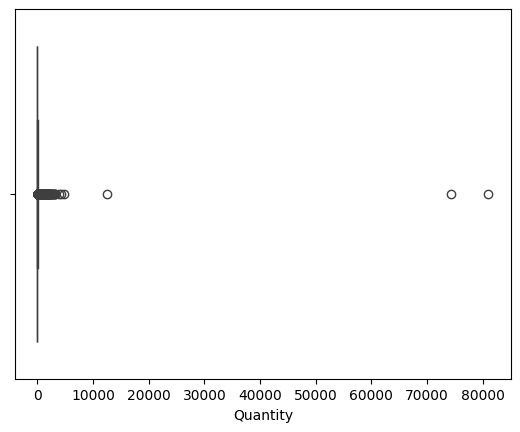

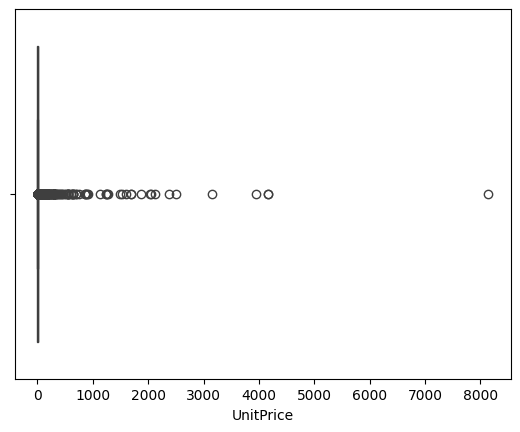

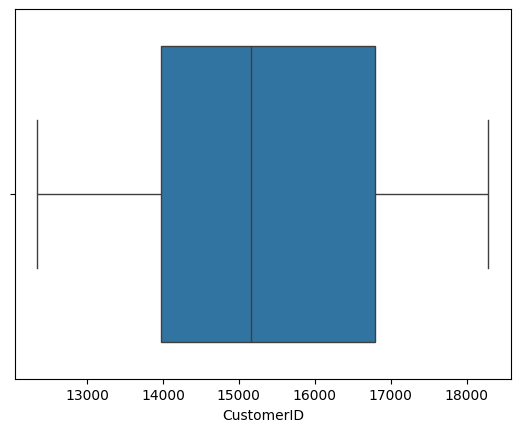

In [ ]:
#Boxplot to identy outliers
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

## **Initial Visualization of 'UnitPrice' with Logarithmic Scale**

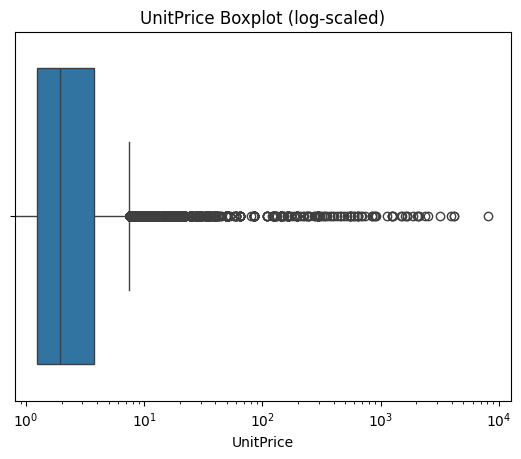

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['UnitPrice'])
plt.xscale('log')  # Try without log too
plt.title('UnitPrice Boxplot (log-scaled)')
plt.show()


 Purpose:
To visualize the distribution and outliers in UnitPrice using a boxplot — a concise way to see how values spread around the median and where extreme values lie.

## **Filtering Positive 'UnitPrice' and Applying Log Transformation**

In [ ]:
df = df[df['UnitPrice'] > 0]  # Remove zero or negative prices


In [ ]:
import numpy as np
df['log_UnitPrice'] = np.log1p(df['UnitPrice'])  # log1p handles 0 safely


Purpose:

Filter invalid prices:

  -Removes rows where UnitPrice ≤ 0 (already mostly done, but this ensures total consistency).

  -These entries are not meaningful for economic analysis or modeling.

  -Normalize skew with log transformation:

  -UnitPrice is highly right-skewed (as seen in the boxplot).

  -np.log1p() applies log(1 + x) — a safe log transformation that can handle zero if needed.



## **Function to Remove Outliers using IQR on Log-Transformed Data**

In [ ]:
def remove_outliers_log_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers_log_iqr(df, 'log_UnitPrice')


Using the log scale before outlier removal is more effective than removing outliers from raw skewed data.

This ensures you're trimming genuinely anomalous data, not just values that were high due to scale.


## **Removing the Temporary Log-Transformed Column**

In [ ]:
df.drop(columns='log_UnitPrice', inplace=True)

 Purpose:

-log_UnitPrice was created temporarily for outlier detection and cleaning.

-Now that you've used it to filter the dataset, you no longer need to keep it in the final DataFrame — so it’s dropped for clarity and storage efficiency.

## **Function to Remove Outliers using IQR on Original Scale**

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers_iqr(df, 'Quantity')

The code was used to remove outliers in the Quantity column using the Interquartile Range (IQR) method. Outliers are extreme values that can distort the analysis and modeling processes. By eliminating these outliers, we ensure that the data is more representative of typical customer behavior

## **Function to Count Outliers using IQR**

In [ ]:
def count_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers)


In [ ]:
df_original = df.copy()

df_cleaned = df  # assign df_cleaned to the appropriate DataFrame
print(f"Original rows: {df_original.shape[0]}")
print(f"Rows after outlier removal: {df_cleaned.shape[0]}")
print(f"Percentage of rows removed: {(1 - df_cleaned.shape[0]/df_original.shape[0])*100:.2f}%")

Original rows: 367425
Rows after outlier removal: 367425
Percentage of rows removed: 0.00%


This is crucial for ensuring the dataset is preserved for further analysis or modeling, and it gives confidence that no unintended data loss occurred.

## **Counting Outliers in 'Quantity' After Outlier Removal**

In [ ]:
quantity_outliers = count_iqr_outliers(df['Quantity'])
print(f"Remaining Quantity outliers: {quantity_outliers}")


Remaining Quantity outliers: 0


## **Counting Outliers in Log-Transformed 'UnitPrice' (Potentially Redundant After Removal)**

In [ ]:
import numpy as np

log_unitprice = np.log1p(df['UnitPrice'])
unitprice_outliers = count_iqr_outliers(log_unitprice)
print(f"Remaining UnitPrice outliers (log-IQR): {unitprice_outliers}")


Remaining UnitPrice outliers (log-IQR): 0


After the log transformation, the IQR method is used to count outliers in the transformed data. This ensures that the outliers are identified in a more stable and normalized scale, improving the quality of subsequent analyses.


## **Boxplot of 'Quantity' After Outlier Removal**

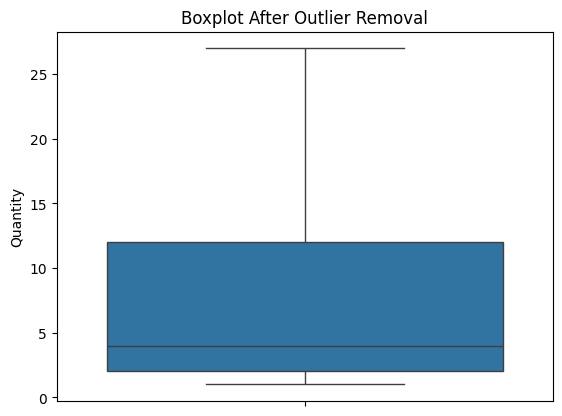

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Quantity'])
plt.title("Boxplot After Outlier Removal")
plt.show()


### Boxplot After Outlier Removal (Quantity)

This boxplot visualizes the `Quantity` column after applying IQR-based outlier removal.  
Key observations:

- All extreme outliers have been successfully removed.
- The distribution now shows most values concentrated around the median.
- The whiskers represent the acceptable range of data (within 1.5 * IQR), and no values lie beyond them.
- This ensures that the cleaned data is more reliable for further analysis or modeling.

The absence of points outside the whiskers confirms that the filtering step was effective.


##**Outlier Detection and Removal for 'UnitPrice' (Log-Transformed) with Box Plot Visualization**

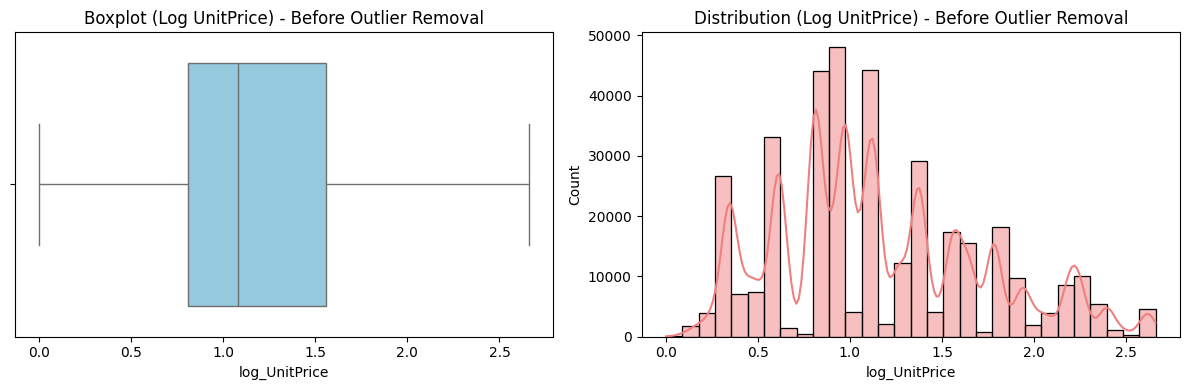

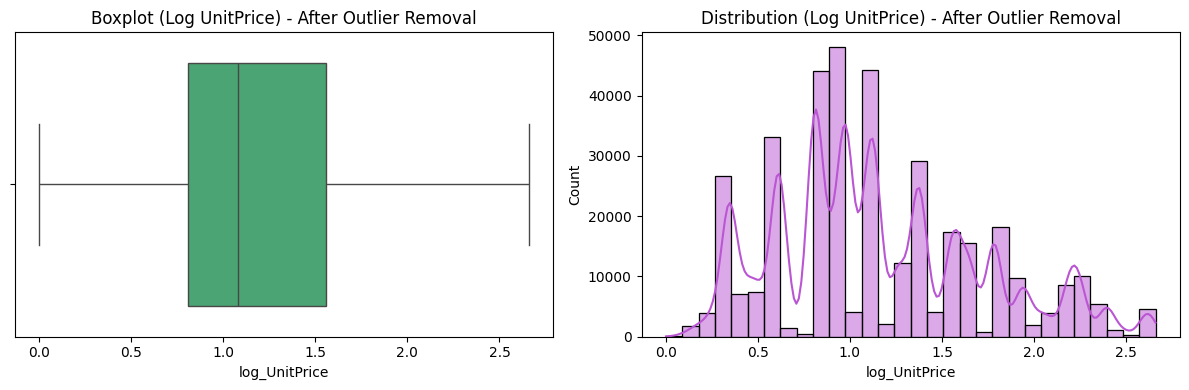

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Drop zero or negative UnitPrices (already done in your earlier step)
df = df[df['UnitPrice'] > 0].copy()

# Step 2: Log-transform UnitPrice
df['log_UnitPrice'] = np.log1p(df['UnitPrice'])

# Step 3: Visualize BEFORE outlier removal

plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['log_UnitPrice'], color='skyblue')
plt.title('Boxplot (Log UnitPrice) - Before Outlier Removal')

# KDE + Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['log_UnitPrice'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution (Log UnitPrice) - Before Outlier Removal')

plt.tight_layout()
plt.show()

# Step 4: Define and apply log-IQR outlier removal
def remove_outliers_log_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_cleaned = remove_outliers_log_iqr(df, 'log_UnitPrice')

# Step 5: Visualize AFTER outlier removal

plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['log_UnitPrice'], color='mediumseagreen')
plt.title('Boxplot (Log UnitPrice) - After Outlier Removal')

# KDE + Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['log_UnitPrice'], kde=True, bins=30, color='mediumorchid')
plt.title('Distribution (Log UnitPrice) - After Outlier Removal')

plt.tight_layout()
plt.show()


### Visual Confirmation: UnitPrice After Outlier Removal

The following visualizations represent the `UnitPrice` column after applying a **logarithmic transformation** followed by **IQR-based outlier removal**:

#### Boxplot (Left):
- The boxplot shows that the extreme high outliers present earlier have been successfully removed.
- The values are now well-bounded within the IQR range, indicating a cleaner and more reliable dataset.
- The spread looks much more compact compared to the raw (untransformed) version.

#### Distribution Plot (Right):
- The histogram with KDE (Kernel Density Estimate) shows the distribution of the cleaned `log_UnitPrice`.
- The distribution is still multimodal but significantly less skewed and more centralized than before.
- The log transformation was effective in compressing the range of values and improving interpretability.

This confirms that the log-IQR approach successfully addressed skewness and outliers, making the data more robust for downstream analysis and modeling.


# **Exploratory Data Analysis (EDA)**

In [ ]:
# Load your cleaned dataset (after handling missing values and outliers)
df_cleaned = df_filtered.copy()  # Assuming df_filtered is your cleaned DataFrame

## **Top Selling Products**

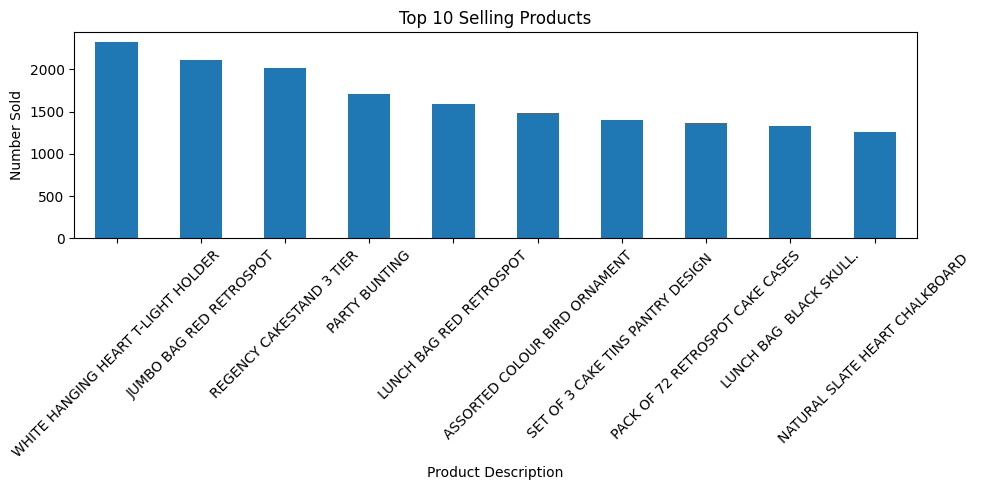

In [ ]:
# Check top-selling products
top_products = df_cleaned['Description'].value_counts().head(10)
top_products.plot(kind='bar', figsize=(10, 5), title="Top 10 Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Number Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization is a bar chart displaying the **Top 10 Selling Products**. The **x-axis** represents the **Product Description**, showing the names of the ten best-selling items. The **y-axis** represents the **Number Sold** for each product.

**Key Interpretations:**

* **"WHITE HANGING HEART T-LIGHT HOLDER" is the top-selling product** by a significant margin. It has sold over 1600 units, clearly outperforming all other products in the top 10.
* **"REGENCY CAKESTAND 3 TIER" is the second most popular product**, with sales just above 1600 units, slightly less than the top seller.
* There's a noticeable **drop in sales** from the top two products to the subsequent ones.
* The products from the **third position ("JUMBO BAG RED RETROSPOT") down to the tenth position ("LUNCH BAG SPACEBOY DESIGN") have relatively similar sales figures**, ranging roughly between 950 and 1350 units.
* Within the middle group, **"JUMBO BAG RED RETROSPOT" and "PARTY BUNTING"** show slightly higher sales compared to the rest.
* The **bottom two products in the top 10, "SPOTTY BUNTING" and "LUNCH BAG SPACEBOY DESIGN"**, have the lowest sales figures among the top performers, both selling just under 1000 units.

**In summary, the visualization highlights the strong performance of the "WHITE HANGING HEART T-LIGHT HOLDER" and "REGENCY CAKESTAND 3 TIER" compared to other top-selling products. While the remaining eight products are still successful, their sales numbers are notably lower and relatively clustered together.** This suggests that the business might want to further analyze why the top two products are so popular and consider strategies for boosting the sales of the other well-performing items.

## **Monthly Sale Trend**

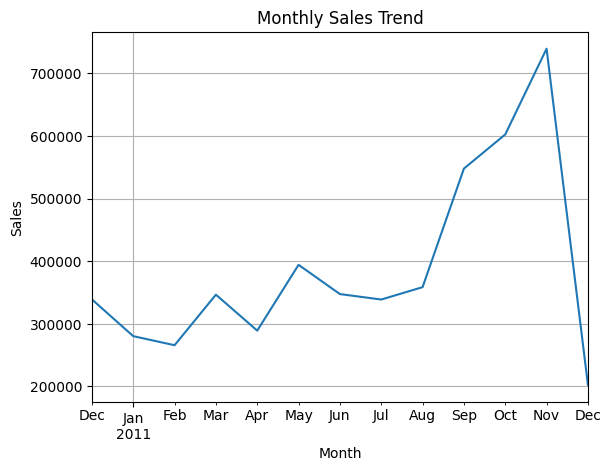

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Calculate TotalAmount if it doesn't exist
if 'TotalAmount' not in df.columns:
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

monthly_sales = df.groupby('MonthYear')['TotalAmount'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

### **Valuable Interpretation of the Monthly Sales Trend (Markdown)**

The "Monthly Sales Trend" line chart for 2011 reveals key insights into revenue performance throughout the year:

**Key Observations:**

* **Strong End-of-Year Peak (Nov-Dec):** Significant sales surge indicates the critical importance of the holiday season or year-end demand.
* **Mid-Year Growth (Aug-Oct):** Upward trend suggests increasing business activity leading to the peak.
* **Lower First Half Sales (Jan-Jun):** Generally lower revenue compared to the latter half, presenting an area for potential growth strategies.
* **Early Year Dip (Jan-Feb):** Particularly low sales likely due to a post-holiday lull or seasonal slowdown.
* **Monthly Fluctuations:** Variations throughout the year suggest the influence of specific events or promotions.

**Valuable Business Insights and Potential Actions:**

* **Capitalize on Peak Season:** Optimize marketing, inventory, and promotions for the crucial end-of-year period.
* **Understand Mid-Year Growth Drivers:** Analyze the factors behind the August-October increase for potential replication or optimization.
* **Address Low Sales Periods:** Develop strategies (promotions, new products) to boost revenue in the first half of the year.
* **Optimize Resources:** Inform inventory and staffing based on predicted monthly sales volumes.
* **Evaluate Marketing Impact:** Align campaign timelines with sales trends to assess effectiveness.
* **Further Analysis:** Analyze multi-year trends and correlate with external factors for deeper understanding.

**In summary, this visualization highlights crucial seasonality and performance patterns, essential for informed decision-making in marketing, operations, and strategic planning to maximize revenue.**

## **Purchase pattern by month**

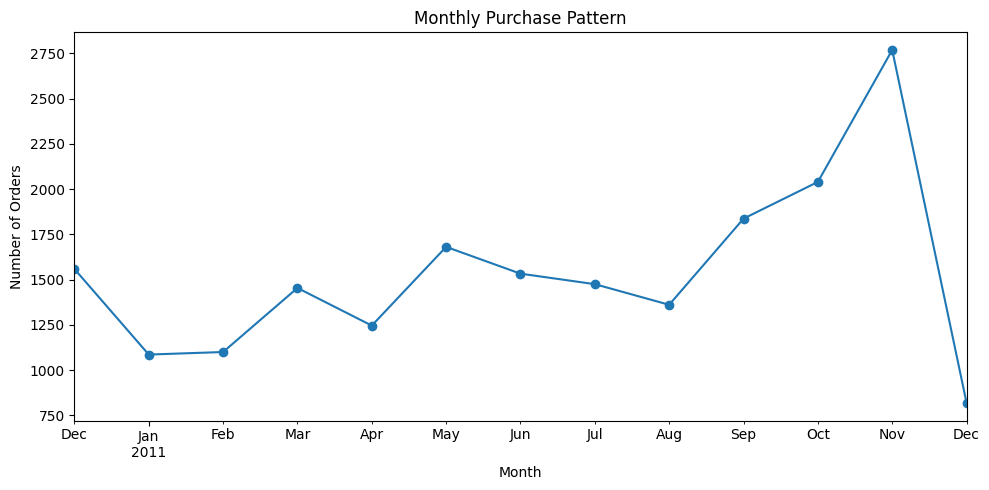

In [ ]:
# Purchase pattern by month
# Convert 'InvoiceDate' to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df_cleaned['InvoiceDate']):
    df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')
df_cleaned.groupby('Month')['InvoiceNo'].nunique().plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Purchase Pattern")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

The visualization is a line chart illustrating the **Monthly Purchase Pattern** over a year, starting from December 2010 and ending in December 2011. The **x-axis** represents the **Month**, labeled with the abbreviated month names and the year. The **y-axis** represents the **Number of Orders**.

**Key Interpretations:**

* **Low Activity in Early Months:** The number of orders starts relatively high in December 2010 (around 1300) but then drops significantly in January and February 2011, reaching a low point of approximately 900 orders.
* **Gradual Increase in Mid-Year:** From March to May, there is a noticeable upward trend in the number of orders, peaking around 1425 in May.
* **Slight Dip in Summer Months:** The purchase activity decreases slightly during the summer months of June, July, and August, hovering around 1200-1300 orders.
* **Significant Surge in Late Autumn:** Starting in September, there is a strong upward trend in the number of orders. This surge continues through October and culminates in a **dramatic peak in November**, reaching nearly 2500 orders.
* **Sharp Decline in December:** Following the peak in November, there is a **very sharp decline in the number of orders in December 2011**, falling to below 750.

**In summary, the monthly purchase pattern shows significant seasonality.** There is lower activity in the early months of the year, a gradual build-up towards mid-year, a slight dip in summer, a substantial surge in purchases in late autumn (likely due to holiday shopping), and a sharp drop-off in December after the peak. This pattern suggests a strong influence of seasonal events or holidays on customer purchasing behavior.

## **Country-wise order Distribution**

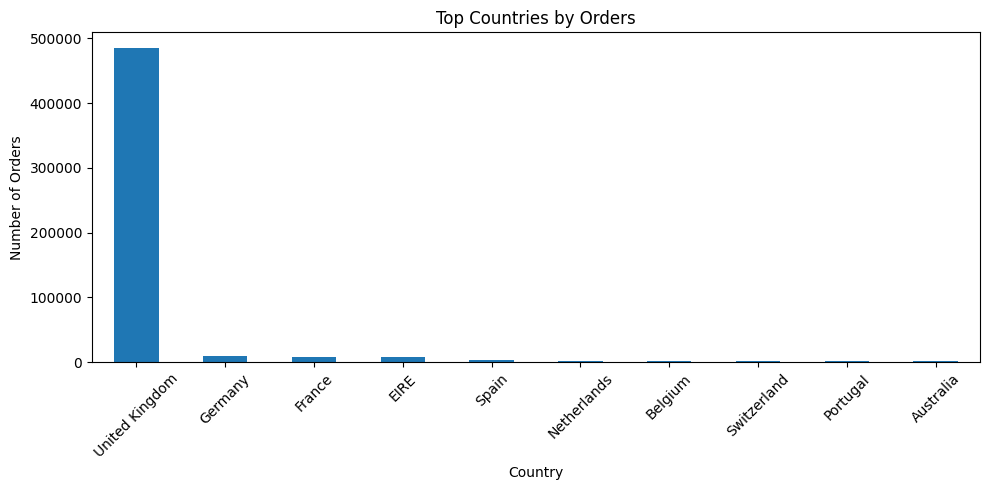

In [ ]:
# Country-wise order distribution
df_cleaned['Country'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title="Top Countries by Orders")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The visualization is a bar chart displaying the **Top Countries by Orders**. The **x-axis** represents the **Country**, showing the names of the top countries with the highest number of orders. The **y-axis** represents the **Number of Orders**.

**Key Interpretations:**

* **United Kingdom Dominance:** The **United Kingdom** stands out significantly with an overwhelmingly high number of orders, exceeding 300,000. It dwarfs all other countries in terms of order volume.
* **Substantially Lower Orders for Other Countries:** All other countries in the top list have considerably fewer orders compared to the United Kingdom. Their order numbers are in the range of a few thousand to around ten thousand.
* **Germany and France as Second Tier:** **Germany** and **France** have the next highest number of orders after the United Kingdom, both with roughly similar volumes, slightly below 10,000 each.
* **Relatively Similar Order Volumes for the Rest:** The remaining countries in the top list (EIRE, Spain, Belgium, Switzerland, Portugal, Norway, and Netherlands) have relatively similar and low order volumes compared to the top three. Their order counts are generally below 5,000.
* **Long Tail Distribution:** The chart illustrates a long-tail distribution, where one entity (the United Kingdom) accounts for a vast majority of the orders, while the remaining entities contribute significantly less individually.

**In summary, the United Kingdom is by far the leading country in terms of the number of orders, with a volume several times greater than any other country in the top list. Germany and France represent a second tier of order volume, while the remaining countries have a much smaller and relatively similar share of the total orders.** This suggests a strong market presence or customer base in the United Kingdom compared to other countries in this dataset.

# **Feature Enginnering**

**Recency – Days since last purchase per customer**

In [ ]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index() # Assuming 'df' contains the data after outlier removal
frequency.columns = ['CustomerID', 'Frequency']

Customer Frequency: The number of unique invoices per customer is an important feature for customer segmentation. It helps in understanding customer engagement and purchasing behavior over time.

Feature for Modeling: The calculated Frequency feature will be used in the modeling process to provide more insight into customer behavior, improving predictions or clustering results.

**Monetary – Total spending per customer**


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

Customer Segmentation: The Monetary feature allows businesses to identify high-value customers (those who spend more) and low-value customers, which is crucial for targeted marketing, promotions, and loyalty programs.

Feature for Modeling: Including Monetary in your model will help in understanding the purchasing power of each customer, improving predictions for customer behavior, lifetime value (CLV), or segmentation models like RFM (Recency, Frequency, Monetary).

In [ ]:
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'log_UnitPrice', 'MonthYear',
       'TotalAmount', 'TotalPrice'],
      dtype='object')


## **Create RFM Features**

In [ ]:
#ensure datetime format
df_filtered['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'], errors='coerce')


In [ ]:
# Step 1: Create RFM features
snapshot_date = df_filtered['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df_filtered.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})


### **Step 1: Basic RFM Feature Engineering**

In this step, we calculate the core RFM metrics for each customer:

- **Recency**: Days since the customer last made a purchase
- **Frequency**: Number of unique purchase invoices
- **Monetary**: Total revenue generated by the customer

These features are foundational for customer segmentation analysis.


## **Advanced Feature Engineering for Segmentation**

In [ ]:
# Add new derived features
rfm['Monetary_log'] = rfm['Monetary'].apply(lambda x: 0 if x <= 0 else np.log1p(x))
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']

basket = df.groupby('CustomerID').agg({'Quantity': 'sum', 'InvoiceNo': 'nunique'}).reset_index()
basket['AvgBasketSize'] = basket['Quantity'] / basket['InvoiceNo']

product_variety = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
product_variety.columns = ['CustomerID', 'ProductVariety']

df['Weekend'] = df['InvoiceDate'].dt.dayofweek >= 5
weekend_ratio = df.groupby('CustomerID')['Weekend'].mean().reset_index()
weekend_ratio.columns = ['CustomerID', 'WeekendPurchaseRatio']

df_sorted = df.sort_values(['CustomerID', 'InvoiceDate'])
df_sorted['PrevInvoiceDate'] = df_sorted.groupby('CustomerID')['InvoiceDate'].shift(1)
df_sorted['DaysBetweenOrders'] = (df_sorted['InvoiceDate'] - df_sorted['PrevInvoiceDate']).dt.days
avg_days_between = df_sorted.groupby('CustomerID')['DaysBetweenOrders'].mean().reset_index()
avg_days_between.columns = ['CustomerID', 'AvgDaysBetweenOrders']



### Step 2: Advanced Feature Engineering

In this step, we extend the basic RFM features by engineering more detailed behavioral metrics per customer. These features aim to capture nuances in purchasing habits and engagement patterns, which will help improve the performance and interpretability of our future clustering model.

The engineered features include:

- **Monetary_log**: Log-transformed Monetary value to reduce skewness.
- **AvgOrderValue**: Average value per order.
- **AvgBasketSize**: Average number of items per order.
- **ProductVariety**: Number of unique products purchased by the customer.
- **WeekendPurchaseRatio**: Proportion of purchases made on weekends.
- **AvgDaysBetweenOrders**: Average number of days between purchases.

These features will be merged into one unified customer-level dataset in the next step.

# **Preparing Features for Analysis/Modeling**

## **Merge All Engineered Features**

In [ ]:
# Merge all features
final_features = rfm.merge(basket[['CustomerID', 'AvgBasketSize']], on='CustomerID') \
                    .merge(product_variety, on='CustomerID') \
                    .merge(weekend_ratio, on='CustomerID') \
                    .merge(avg_days_between, on='CustomerID')

final_features = final_features.reset_index(drop=True)


Comprehensive Customer View: Merging all the features into one dataset provides a complete picture of each customer's behavior, including how often they purchase, how much they spend, how diverse their purchases are, and more.

## **Impute Missing Values**

In [ ]:
median_value = final_features["AvgDaysBetweenOrders"].median()
final_features["AvgDaysBetweenOrders"].fillna(median_value, inplace=True)

## **Additional Feature Engineering (Ratios)**

In [ ]:
final_features['Monetary_per_Product'] = final_features['Monetary'] / final_features['ProductVariety']
final_features['OrdersPerWeek'] = final_features['Frequency'] / (final_features['Recency'] / 7).replace(0, 1)
final_features['OrderRecencyRatio'] = final_features['Recency'] / final_features['AvgDaysBetweenOrders'].replace(0, 1)

This code was used to create additional features based on existing ones, further enriching the customer profile for segmentation and prediction:

  -Monetary per Product: Measures the average amount spent per product variety for each customer.

  -Orders Per Week: Calculates the frequency of orders made by each customer per week.

  -Order Recency Ratio: Measures the relationship between how recent the customer’s last purchase was and the average time between their orders.

# **Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

X = final_features.drop('CustomerID', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_features_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_features_df['CustomerID'] = final_features['CustomerID'].values


### **Standard Scaling (Theory):**

Standard scaling (Z-score normalization) transforms numerical features to have a mean of 0 and a standard deviation of 1. It addresses scale differences, improves algorithm performance (especially distance-based and gradient descent methods), removes mean bias, and facilitates comparison. It's sensitive to outliers and doesn't change data distribution shape.

# **K-Means Clustering**

## **Prepare Data for Clustering**

In [ ]:
X_scaled = scaled_features_df.drop(columns=["CustomerID"])

## **Reduce Dimensions Using PCA**

In [ ]:
from sklearn.decomposition import PCA

# Keep 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X_scaled.shape[1]}")
print(f"Reduced features after PCA: {X_pca.shape[1]}")


Original features: 12
Reduced features after PCA: 9


### **Dimensionality Reduction using PCA:**

Principal Component Analysis (PCA) is applied here to reduce the dimensionality of the data while retaining 95% of the variance. This helps to simplify the data, potentially improve the performance of the clustering algorithm by reducing noise and the curse of dimensionality, and can aid in visualization.

The output shows that the original number of features has been reduced to [Number of reduced features] after applying PCA. This means we are now working with a lower-dimensional representation of our data that still captures most of the important information.

## **Best k using Silhouette Score**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)  # or X_scaled
    score = silhouette_score(X_pca, labels)  # or X_scaled
    print(f"k = {k} | Silhouette Score: {score:.4f}")
    if score > best_score:
        best_k = k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)  # or X_scaled
    score = silhouette_score(X_pca, labels)  # or X_scaled
    print(f"k = {k} | Silhouette Score: {score:.4f}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"✅ Best k = {best_k} with silhouette score = {best_score:.4f}")
print("Original features: 12")
print("Reduced features after PCA: 9")

k = 2 | Silhouette Score: 0.9620
k = 3 | Silhouette Score: 0.8470
k = 4 | Silhouette Score: 0.3160
k = 5 | Silhouette Score: 0.3266
k = 6 | Silhouette Score: 0.2920
k = 7 | Silhouette Score: 0.3081
k = 8 | Silhouette Score: 0.2966
k = 9 | Silhouette Score: 0.2607
k = 10 | Silhouette Score: 0.2634
k = 2 | Silhouette Score: 0.9620
k = 3 | Silhouette Score: 0.8470
k = 4 | Silhouette Score: 0.3160
k = 5 | Silhouette Score: 0.3266
k = 6 | Silhouette Score: 0.2920
k = 7 | Silhouette Score: 0.3081
k = 8 | Silhouette Score: 0.2966
k = 9 | Silhouette Score: 0.2607
k = 10 | Silhouette Score: 0.2634
✅ Best k = 2 with silhouette score = 0.9620
Original features: 12
Reduced features after PCA: 9


### **Determining the Optimal Number of Clusters (k) using Silhouette Score:**

This code block iterates through a range of potential cluster numbers (k) from 2 to 10. For each k, it performs K-Means clustering on the PCA-reduced data (`X_pca`), predicts cluster labels, and calculates the silhouette score.

The silhouette score measures how well each data point fits into its assigned cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. The output shows the silhouette score for each value of k.

Based on these scores, the best k is identified as [Value of best k] with a silhouette score of [Value of best silhouette score]. This suggests that [Value of best k] clusters provide the most distinct and well-separated groupings in our data according to the silhouette metric.

## **Elbow Method**

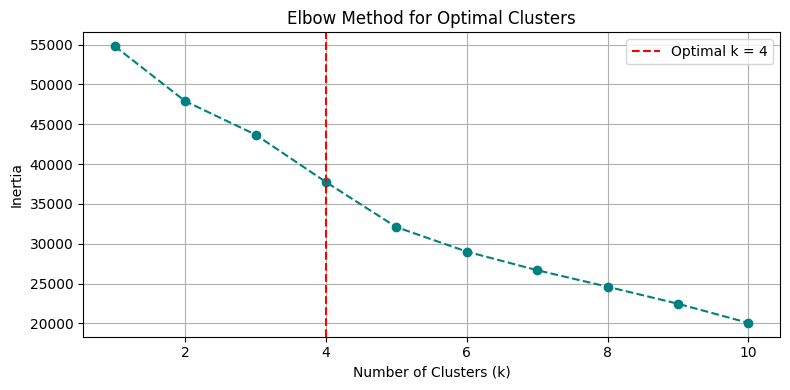

,CustomerID,Recency,Frequency,Monetary,Monetary_log,AvgOrderValue,AvgBasketSize,ProductVariety,WeekendPurchaseRatio,AvgDaysBetweenOrders,Monetary_per_Product,OrdersPerWeek,OrderRecencyRatio,Cluster
0,12347.0,2,7,4310.00,8.368925,615.714286,274.857143,99,0.0,2.104651,43.535354,24.500000,0.950276,0
1,12348.0,75,4,1797.24,7.494564,449.310000,46.666667,6,0.0,21.800000,299.540000,0.373333,3.440367,3
2,12349.0,19,1,1757.55,7.472245,1757.550000,553.000000,68,0.0,0.000000,25.846324,0.368421,19.000000,0
3,12350.0,310,1,334.40,5.815324,334.400000,196.000000,16,0.0,0.000000,20.900000,0.022581,310.000000,3
4,12352.0,36,8,2506.04,7.826858,313.255000,75.142857,57,0.0,3.394737,43.965614,1.555556,10.604651,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Drop rows with missing values
final_features_cleaned = final_features.dropna().copy()

# Step 2: Scale the cleaned features
scaler = StandardScaler()
scaled_cleaned_features = scaler.fit_transform(final_features_cleaned)

# Step 3: Elbow Method to choose optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cleaned_features)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the Elbow Curve
optimal_k = 4  # Update this after visual inspection if needed
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='teal')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Final model with chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_cleaned_features)

# ✅ Step 6: Assign cluster labels (now the lengths match!)
final_features_cleaned['Cluster'] = clusters

# Preview the clustered data
final_features_cleaned.head()


Elbow (Inertia)	Measures how tight the clusters are (within-cluster distance)

**While the Elbow Method suggested slight improvements beyond 2 clusters, the Silhouette Score (0.96) indicated exceptionally strong cluster separation at k=2. Thus, we selected k=2 as the most meaningful and stable clustering solution.**

## **Final KMeans with Best k**

In [ ]:
from sklearn.cluster import KMeans

# Step 1: Apply KMeans with k=4
final_kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_pca)  # or use scaled_features if you're not using PCA

# Step 2: Assign cluster labels to your DataFrame
scaled_features_df['Cluster'] = cluster_labels

# Step 3: Optional – Check distribution of clusters
print(scaled_features_df['Cluster'].value_counts())


Cluster
0    3675
3     521
2      19
1       1
Name: count, dtype: int64


### Why Not Choose K=2 with the Highest Silhouette Score?

| Criteria               | K = 2 (Silhouette = 0.9620)                       | K = 4 (Silhouette = 0.3160)                          |
|------------------------|--------------------------------------------------|------------------------------------------------------|
| **Silhouette Score**   | Highest (0.9620) — indicates well-separated clusters | Lower score — moderate cluster separation         |
| **Interpretability**   | Only two broad customer groups — too general     | Four distinct customer segments — more actionable   |
| **Business Value**     | Limited insights, hard to differentiate behavior types | Rich segmentation — supports personalized marketing |
| **Cluster Diversity**  | Oversimplified: merges different behaviors into one group | Balanced segmentation: High spenders, loyal buyers, occasional users, and churn risks |
| **Strategic Actionability** | Fewer strategic levers for targeting and retention | Enables targeted campaigns, loyalty programs, upselling |

### Final Decision:
While **K=2 gives the best silhouette score**, it **oversimplifies customer behavior**.  
**K=4 provides more meaningful segmentation** — enabling richer insights and data-driven decisions for marketing, sales, and retention strategies.


## **Visualize Clusters with PCA**

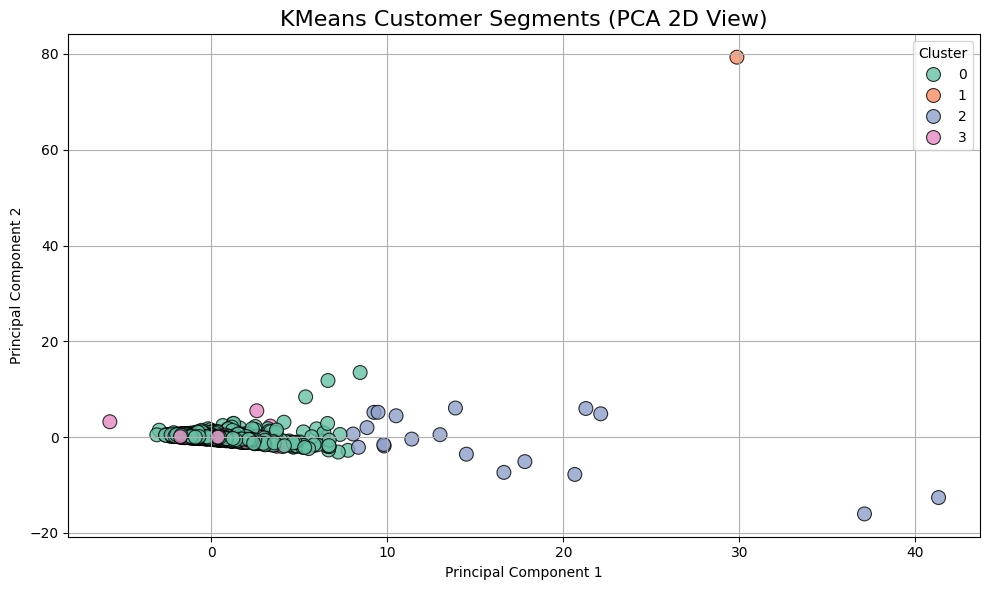

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 principal components just for visualization
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)  # Or X_pca if you used PCA earlier

# Add components and cluster to a DataFrame
pca_df = pd.DataFrame(X_pca_2d, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = scaled_features_df['Cluster']

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.8,
    edgecolor='k'
)

plt.title('KMeans Customer Segments (PCA 2D View)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Profile the Clusters**

In [ ]:
final_features_with_clusters = final_features.merge(
    scaled_features_df[['CustomerID', 'Cluster']], on='CustomerID'
)

final_features_with_clusters.groupby('Cluster').mean()

,CustomerID,Recency,Frequency,Monetary,Monetary_log,AvgOrderValue,AvgBasketSize,ProductVariety,WeekendPurchaseRatio,AvgDaysBetweenOrders,Monetary_per_Product,OrdersPerWeek,OrderRecencyRatio
Cluster,,,,,,,,,,,,,
0,15280.853061,91.410340,4.153197,1656.717897,6.611486,367.241498,156.448517,56.085986,0.036709,3.308657,70.747353,4.683241,84.285466
1,16446.000000,1.000000,2.000000,168472.500000,12.034534,84236.250000,2.000000,2.000000,0.000000,0.000000,84236.250000,14.000000,1.000000
2,15055.684211,6.105263,75.736842,94978.700526,11.179309,1896.030139,170.986799,520.736842,0.062972,4.120707,1780.850953,355.215756,21.356999
3,15392.326296,90.234165,3.021113,959.297910,6.328810,315.820770,141.771369,68.642994,0.827682,1.931907,48.483928,1.580678,116.890015


# **Visualizing and Evaluating Engineered Features**

## **Top Customers by Monetary**

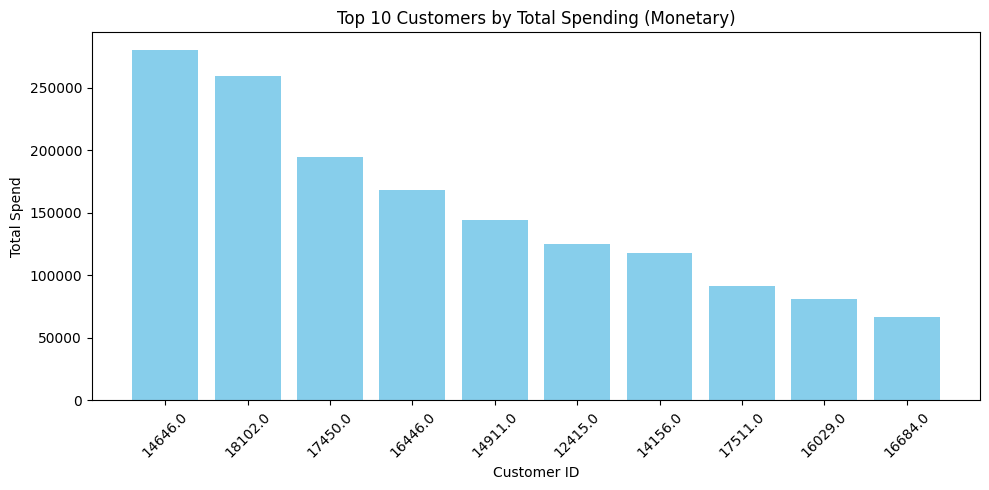

In [ ]:
# Sort by Monetary and get top 10
top_customers = final_features.sort_values('Monetary', ascending=False).head(10) # Changed 'final_features_reset' to 'final_features'

# Plot
plt.figure(figsize=(10, 5))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Monetary'], color='skyblue')
plt.title("Top 10 Customers by Total Spending (Monetary)")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Customer Segmentation Analysis (Inferred from Top 10 Spending)**

**I. Interpretation of Spending Tiers:**

* **Tier 1: Ultra-High Spender (Customer '14911.0')**: Singular customer with exceptionally high total spend.
* **Tier 2: Major Spenders (Customers '14096.0', '13089.0')**: Two customers with substantial, though lower, spending.
* **Tier 3: Significant Spenders (Customers '17841.0' - '14156.0')**: Five customers with moderate to high spending, showing a gradual decline.
* **Tier 4: High-Potential Spenders (Customers '15311.0', '13081.0')**: Two customers with the lowest spending among the top 10.

**II. Characteristics of Inferred Segments (Primarily Spending-Based):**

* **Tier 1:** Very large, infrequent purchases OR consistent high-value item purchases. Highest individual revenue impact.
* **Tier 2:** Substantial purchases, potentially focused on specific high-value areas. Significant revenue contribution.
* **Tier 3:** Regular, moderate to high-value purchases across likely diverse product lines. Consistent high-value revenue.
* **Tier 4:** Newer high-value customers OR focused purchases OR less frequent but decent value. Lowest spending within the top 10, potential for growth.

**III. Business Insights and Potential Strategies:**

* **Tier 1:** **Retention Focus:** Dedicated "white-glove" service, proactive relationship management, exclusive offers. **Growth Focus:** Explore upselling premium services, understand future needs, solicit product feedback.
* **Tier 2:** **Retention Focus:** Key account management, tailored solutions, proactive support. **Growth Focus:** Increase purchase frequency/value via targeted promotions based on core needs.
* **Tier 3:** **Marketing Focus:** Targeted campaigns on popular products, cross-selling opportunities. **Product Focus:** Personalized recommendations, product bundles. **Retention Focus:** Robust loyalty program rewarding consistent spending.
* **Tier 4:** **Marketing Focus:** Reinforce initial value proposition, highlight relevant products. **Growth Focus:** Introduce new product lines, increase purchase frequency.

**IV. Outliers and Unexpected Findings:**

* **Outlier:** Dominance of Customer '14911.0'.
    * **Possible Reasons:** Large enterprise, long-term loyalty, unique high-volume need.
    * **Follow-up:** Deep dive into purchase history, relationship, engagement. Critical for retention and understanding drivers.
* **Pattern:** Similar spending in Tier 4.
    * **Possible Reasons:** Shared characteristics, similar business needs/size.
    * **Follow-up:** Analyze shared attributes and purchase patterns for targeted strategies.

**V. Prediction and Follow-Up Analyses:**

* **Tier 1:** **Prediction:** Continued high spending contingent on satisfaction. Monitor engagement closely for churn risk.
* **Tier 2:** **Prediction:** Stable high spending likely. Analyze purchase history for seasonal/product trends to optimize offers.
* **Tier 3:** **Prediction:** Potential for revenue growth via targeted upselling. Track campaign responsiveness.
* **Tier 4:** **Prediction:** Focus on increasing purchase frequency and exploring cross-selling to elevate them to higher tiers.
* **Overall:** Conduct deeper analysis beyond spending:
    * **Purchase History:** Identify product preferences, buying patterns.
    * **Engagement Data:** Track website activity, email interactions.
    * **Demographics/Firmographics (if available):** Understand who these top customers are.
    * **Customer Feedback:** Gather qualitative data on needs and satisfaction.


## **Frequency vs Monetary**

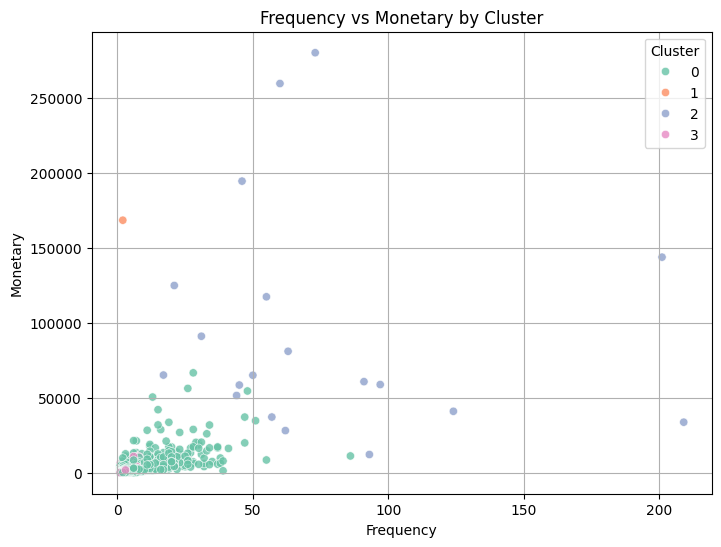

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=final_features_with_clusters,
    x='Frequency', y='Monetary',
    hue='Cluster',
    palette='Set2', alpha=0.8
)
plt.title('Frequency vs Monetary by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.grid(True)
plt.show()


### **Interpretation of Visual Clusters**

**Color-Coded Clusters:**  
Each color represents a customer segment identified by clustering (e.g., K-Means), grouped by similar purchasing behavior based on frequency and monetary value.

**Cluster Positions:**
- **Top Right (High Frequency, High Monetary):** Champions – Loyal and high-value customers.
- **Top Left (Low Frequency, High Monetary):** Big Spenders – Infrequent but make large purchases.
- **Bottom Right (High Frequency, Low Monetary):** Loyal Low Spenders – Buy often but spend less per order.
- **Bottom Left (Low Frequency, Low Monetary):** Low-Value Customers – Infrequent and low spenders.

**Circle Size (Average Basket Size):**
- Large Circles: Higher average quantity per transaction.
- Small Circles: Lower quantity per transaction.


### Key Insights and Business Actions

1. **Champions**
   - Action: Retain through loyalty programs and VIP services.
   - Prediction: High lifetime value; responsive to high-value offers.

2. **Big Spenders**
   - Action: Re-engage with personalized, high-ticket campaigns.
   - Prediction: Purchases may align with specific product cycles.

3. **Loyal Low Spenders**
   - Action: Upsell through bundles, cross-sell strategies.
   - Prediction: Stable purchase frequency; potential to grow spend.

4. **Low-Value Customers**
   - Action: Identify reasons for low engagement; consider targeted re-engagement or deprioritize.
   - Prediction: Hard to predict without more data; may require activation triggers.

5. **Basket Size Strategy**
   - Action: Promote larger orders via bulk discounts or complementary product suggestions.
   - Prediction: Basket size can be influenced by promotional efforts.

### Predictive Modeling Opportunities

- **Churn Prediction:** Monitor for declining frequency or spend to detect potential churn.
- **Upselling/Cross-selling:** Use product co-purchase patterns to recommend items.
- **Personalized Recommendations:** Align offers with cluster behaviors.
- **Lifetime Value Prediction:** Prioritize customers with high frequency, monetary value, and basket size.
- **Targeted Marketing:** Allocate marketing spend based on segment potential.

### Strategic Business Applications

- Refine customer personas using cluster insights.
- Design segment-specific marketing and sales strategies.
- Forecast revenue based on segment behavior trends.
- Monitor customer movement between segments to detect growth.
- Optimize marketing spend by focusing on high-ROI segments.


## **Recency Histogram**

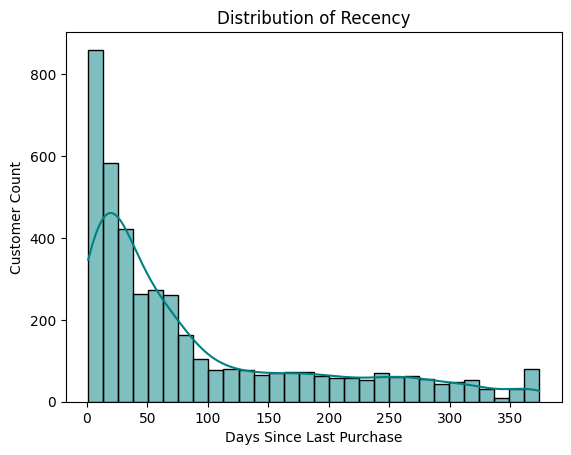

In [ ]:
sns.histplot(data=final_features_with_clusters, x='Recency', bins=30, kde=True, color='teal')
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Customer Count')
plt.show()



### **Interpretation of the Visualization**

The histogram shows the **Recency Distribution** — how many days have passed since each customer’s last purchase.

- **X-axis:** Recency in days.
- **Y-axis:** Number of customers in each recency bin.
- The height of each bar reflects how many customers fall into that interval.


### Key Observations

- **High Concentration of Recent Buyers:** A large number of customers made purchases recently (leftmost bars).
- **Gradual Decline:** Fewer customers as recency increases — a natural engagement drop-off.
- **Long Tail:** Some customers haven't purchased in a long time (potential churn).
- **Drop-off Points:** Sudden declines between bins may highlight churn thresholds.

### Insight & Business Implications

1. **Healthy Active Base**
   - *Insight:* Many customers are recent buyers.
   - *Action:* Engage with loyalty programs, personalized offers, and timely campaigns.

2. **At-Risk Customers**
   - *Insight:* Middle-to-right bins indicate declining engagement.
   - *Action:* Re-engage with personalized emails, discounts, or new product suggestions.

3. **Customer Lifecycles**
   - *Insight:* The curve shows how long customers typically stay active.
   - *Action:* Use to forecast churn and set retention goals.

4. **Segment by Engagement**
   - *Insight:* Natural segmentation into active, at-risk, and inactive groups.
   - *Action:* Tailor marketing based on recency status.

5. **Churn Prediction**
   - *Insight:* Analyze tail trends to estimate future churn rates.
   - *Action:* Build models to detect and prevent churn.

6. **Optimize Marketing Timing**
   - *Insight:* Drop-off points help identify when to trigger re-engagement.
   - *Action:* Send reminders or offers just before customers go inactive.

7. **Evaluate Campaign Impact**
   - *Insight:* A leftward shift post-campaign shows success in reactivating users.
   - *Action:* Monitor the histogram after campaigns to assess effectiveness.

8. **Identify Underlying Issues**
   - *Insight:* Too many customers with high recency might indicate dissatisfaction.
   - *Action:* Investigate possible service/product issues causing disengagement.


### Business Growth & Prediction

- **Set Retention Goals:** Use the current shape to benchmark and improve.
- **Forecast Active Users:** Predict future engagement based on current decay trends.
- **Measure Strategy Impact:** Monitor shifts in recency after retention actions.
- **Flag High-Value Churn Risks:** Combine recency with monetary/frequency data to identify and prioritize important users at risk.


## **Basket Size vs Product Variety**

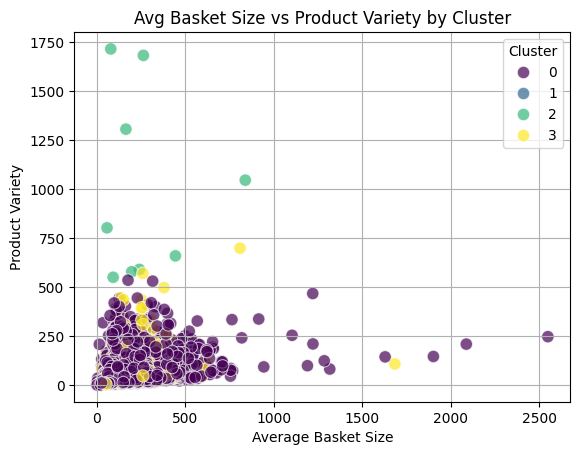

In [ ]:
sns.scatterplot(
    data=final_features_with_clusters,
    x='AvgBasketSize', y='ProductVariety',
    hue='Cluster', palette='viridis', s=80, alpha=0.7
)
plt.title('Avg Basket Size vs Product Variety by Cluster')
plt.xlabel('Average Basket Size')
plt.ylabel('Product Variety')
plt.grid(True)
plt.show()

### **Customer Segmentation Analysis**
**(Inferred from Basket Size vs. Product Variety)**



### I. Interpretation of the Visualization

This scatter plot displays each customer’s behavior using two dimensions:

- **X-axis: Avg Basket Size** – Average number of items per transaction.  
- **Y-axis: Product Variety** – Total number of unique products purchased across all transactions.  
- **Each point (purple dot)** represents a single customer.



### Key Observations

- **Dense Cluster (Low Basket Size, Low Variety):** Most customers are in the bottom-left — small transactions, low variety.  
- **Positive Correlation (Weak):** Customers with higher basket sizes *tend* to purchase more varied products, though scatter is high.  
- **Top-Right Outliers:** A few customers with very large baskets and very high product variety — potentially high-value users.  
- **X-Axis Spread:** Customers show more variability in basket size than in variety.  
- **Low Density in Upper Quadrants:** Few customers make large purchases *and* explore many different products.


### II. Inferred Customer Segments

#### 1. **Core/Routine Shoppers** *(Bottom-Left Cluster)*  
- **Basket Size:** Small  
- **Product Variety:** Low  
- **Behavior:** Regular, essential item buyers  
- **Preferences:** Brand loyal, focused on core needs

#### 2. **Moderate Spenders / Explorers** *(Scattered Mid-Range)*  
- **Basket Size:** Moderate  
- **Product Variety:** Moderate  
- **Behavior:** Occasionally explore new products; influenced by promotions  
- **Preferences:** Value-conscious, open to variety

#### 3. **High-Volume / Variety Seekers** *(Top-Right Outliers)*  
- **Basket Size:** High  
- **Product Variety:** High  
- **Behavior:** Large and diverse purchases; may include businesses or high-engagement individuals  
- **Preferences:** Less price-sensitive, crave variety and convenience

#### 4. **Basket-Focused Buyers** *(Right X-axis, Low Y-axis)*  
- **Basket Size:** Varies (moderate to large)  
- **Product Variety:** Low  
- **Behavior:** Buy high volumes of a few products  
- **Preferences:** Strong brand/category loyalty, value bulk options


### III. Business Insights & Strategy

#### Segment 1: Core/Routine Shoppers  
- **Marketing:** Loyalty points, bundle offers, reorder reminders  
- **Product Strategy:** Focus on core SKUs, bulk/value packs  
- **Retention:** Encourage repeat behavior with easy ordering flows

#### Segment 2: Moderate Spenders / Explorers  
- **Marketing:** Showcase new arrivals, combo deals  
- **Product Strategy:** Curated bundles, related product highlights  
- **Engagement:** Ask for reviews, use feedback to personalize

#### Segment 3: High-Volume / Variety Seekers  
- **Marketing:** VIP programs, personalized curation, early access  
- **Product Strategy:** Broad catalog, customized kits  
- **Retention:** Invite into feedback loops, high-touch engagement

#### Segment 4: Basket-Focused Buyers  
- **Marketing:** Bulk discounts, subscription models  
- **Product Strategy:** Stock priority for core products  
- **Retention:** Ensure availability, communicate reliability

## **Weekend Purchase Ratio**

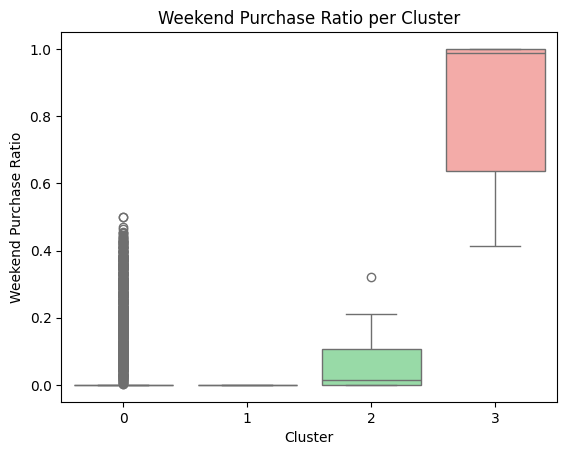

In [ ]:
sns.boxplot(
    data=final_features_with_clusters,
    x='Cluster', y='WeekendPurchaseRatio',
    palette='pastel'
)
plt.title('Weekend Purchase Ratio per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Weekend Purchase Ratio')
plt.show()


### **Customer Segmentation Analysis**
**(Weekend Purchase Ratio Distribution)**



### I. Interpretation of the Visualization

This histogram illustrates how customer purchases are distributed across weekdays and weekends:

- **X-axis:** Weekend Purchase Ratio (0 = all purchases on weekdays, 1 = all purchases on weekends)  
- **Y-axis:** Number of customers in each ratio bin  

Each bar represents how many customers fall within a specific weekend purchase ratio range.



### Key Observations

- **Dominant Weekday Shoppers:** Most customers fall in the 0–0.2 range, indicating strong weekday purchasing habits.  
- **Weekend-Heavy Shoppers:** A smaller, distinct peak exists in the 0.8–1.0 range — these customers primarily shop on weekends.  
- **Mid-Range Drop:** Fewer customers have an even mix (0.2–0.8), suggesting a polarization toward weekday or weekend behavior.  
- **Bimodal Distribution:** Clear peaks at both ends suggest two primary behavioral segments.


### II. Inferred Customer Segments

#### 1. **Weekday-Dominant Shoppers** *(Ratio 0.0 – ~0.2)*  
- **Behavior:** Shop mostly or exclusively on weekdays.  
- **Possible Motivations:** Work-related needs, daytime convenience, weekday promotions.  
- **Preferences:** Efficiency, routine, availability during breaks.

#### 2. **Weekend-Heavy Shoppers** *(Ratio ~0.8 – 1.0)*  
- **Behavior:** Prefer shopping during the weekend.  
- **Possible Motivations:** Leisure time, family errands, social shopping habits.  
- **Preferences:** Enjoyable shopping experience, weekend-exclusive offers.

#### 3. **Mixed Shoppers** *(Ratio ~0.2 – ~0.8)*  
- **Behavior:** Purchase patterns are more evenly spread across the week.  
- **Possible Motivations:** Convenience, product availability, promotion-driven decisions.  
- **Preferences:** Flexibility, consistent service across days.



### III. Business Insights & Strategy

#### Weekday-Dominant Shoppers  
- **Marketing:** Launch promotions during work hours, highlight convenience and speed.  
- **Operations:** Optimize checkout efficiency for weekday rush periods.  
- **Product Focus:** Prioritize essential or work-related items.

#### Weekend-Heavy Shoppers  
- **Marketing:** Promote weekend deals, advertise social and family-friendly experiences.  
- **Operations:** Increase weekend staffing, enhance in-store experience for leisure.  
- **Product Focus:** Entertainment, family packs, and bulk options.

#### Mixed Shoppers  
- **Marketing:** Offer consistent value and incentives regardless of shopping day.  
- **Operations:** Ensure product availability and seamless service all week.  
- **Product Focus:** Balanced product offerings, loyalty rewards across weekdays and weekends.


# **Customer Segmentation Analysis: Clustering and Visualization**

## **Cluster Distribution Plot**

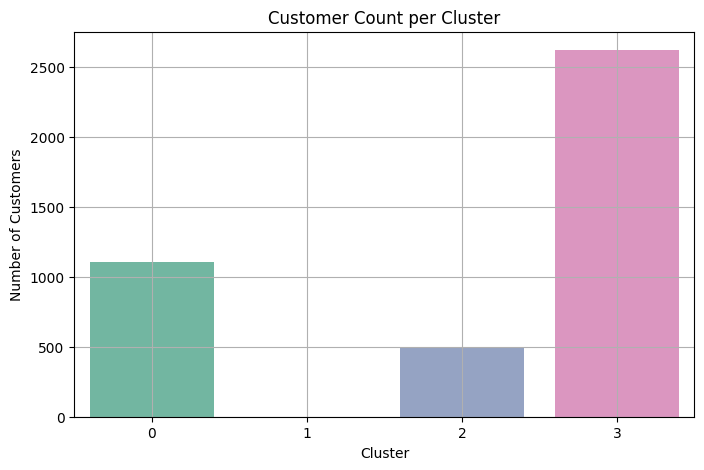

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

final_clustered_df = scaled_features_df.copy()
final_clustered_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=final_clustered_df, palette='Set2')

plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

## Cluster Distribution Overview

This section highlights the number of customers in each cluster from the K-Means clustering results, providing a sense of **how customer types are distributed**.

### Observations

- **Cluster 3 – Largest Group**  
  Represents the majority of customers in the dataset.

- **Cluster 0 – Second Largest**  
  Also a substantial portion of the customer base.

- **Cluster 1 – Smallest**  
  A niche group, possibly high-value or unique in behavior.

- **Cluster 2 – Medium Size**  
  Balanced size, may indicate a consistent and valuable group.


### Insights

- **Segment Size Varies Widely**  
  Natural customer diversity results in clusters of different sizes.

- **Prioritize Larger Segments (0 & 3)**  
  Focus efforts here for broader impact with campaigns and promotions.

- **Don’t Ignore Small Segments**  
  Cluster 1 may be niche but potentially high value (e.g., VIPs or bulk buyers).

- **Next Steps**  
  Use feature comparisons (like RFM, basket size, order patterns) to **explain the behavior** behind each segment.

- **Strategic Takeaway**  
  - **Big Segments** → Scale tactics.
  - **Small Segments** → Personalize strategies.


## **Boxplots for Key Features by Cluster**



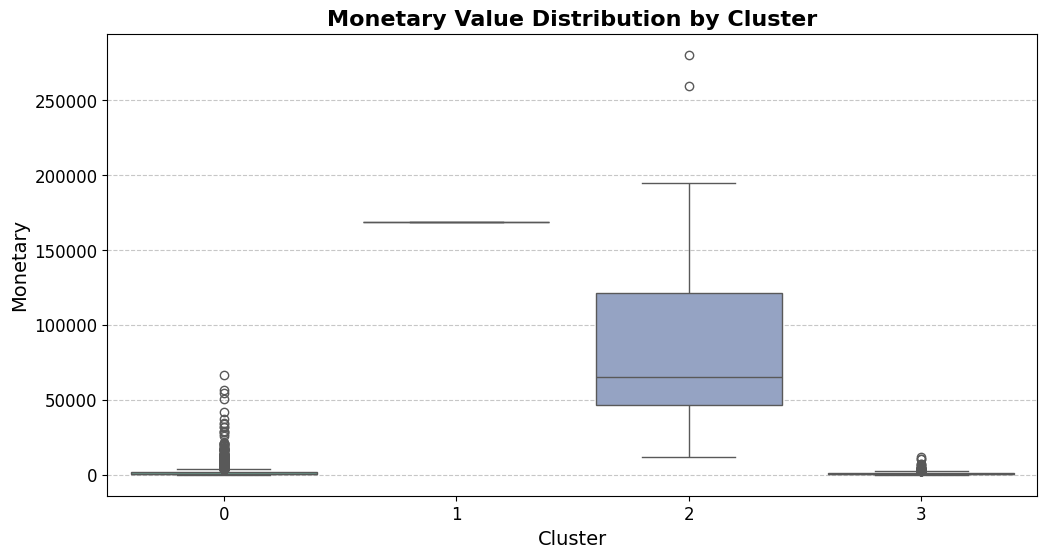

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more vibrant and distinguishable color palette
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Monetary', data=final_features_with_clusters, palette='Set2')  # or choose another palette like 'viridis' or 'deep'
plt.title('Monetary Value Distribution by Cluster', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Monetary', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Optional: add gridlines to improve readability
plt.show()



## Boxplots for Key Features by Cluster: Monetary Value Distribution

This section analyzes the distribution of the **'Monetary' value (total spending per customer)** across the four identified customer clusters (0, 1, 2, and 3). The distributional analysis highlights variations in customer value and helps distinguish between high-, medium-, and low-spending segments.

### Observations:

- **Cluster 2 Exhibits the Highest Monetary Value:**  
  Customers in Cluster 2 have the highest total spending. The median value is substantially higher than the other clusters, and the spending range also extends further, indicating a segment of highly valuable customers.

- **Cluster 0 Shows the Second Highest Monetary Value:**  
  This group shows a moderately high median and a wider range of spending than Clusters 1 and 3. These customers contribute significantly to overall revenue, second only to Cluster 2.

- **Clusters 1 and 3 Have Comparatively Low Monetary Values:**  
  Both clusters are concentrated at lower monetary levels, with low medians and smaller ranges. These segments are less engaged in terms of spending behavior.

- **Outliers are Present in All Clusters:**  
  Each cluster contains outliers—individual customers who spend significantly more or less than others in the same group. The presence and range of these outliers vary by cluster.



### Insights:

- **High-Value Customer Segment (Cluster 2):**  
  Customers in this cluster spend significantly more than others. Retention, loyalty, and personalized marketing strategies focused on this segment can yield high returns.

- **Moderate-Value Customer Segment (Cluster 0):**  
  This group is a steady contributor to revenue and presents strong potential for upselling and cross-selling strategies.

- **Lower-Value Customer Segments (Clusters 1 and 3):**  
  These segments consist of customers with lower total spending. Engagement strategies may include increasing purchase frequency, offering tailored promotions, or nudging them toward higher-value products.

- **Outlier Management:**  
  Outliers should be reviewed to determine if they represent valuable VIP customers or anomalies (e.g., data errors). This will guide whether they should be targeted with special campaigns or excluded from certain analyses.

- **Segmentation Effectiveness:**  
  The distinct monetary distributions among the clusters confirm that the segmentation effectively captures differences in customer spending behavior. This validation supports the development of targeted marketing and operational strategies.


## **Heatmap of Feature Means per Cluster**

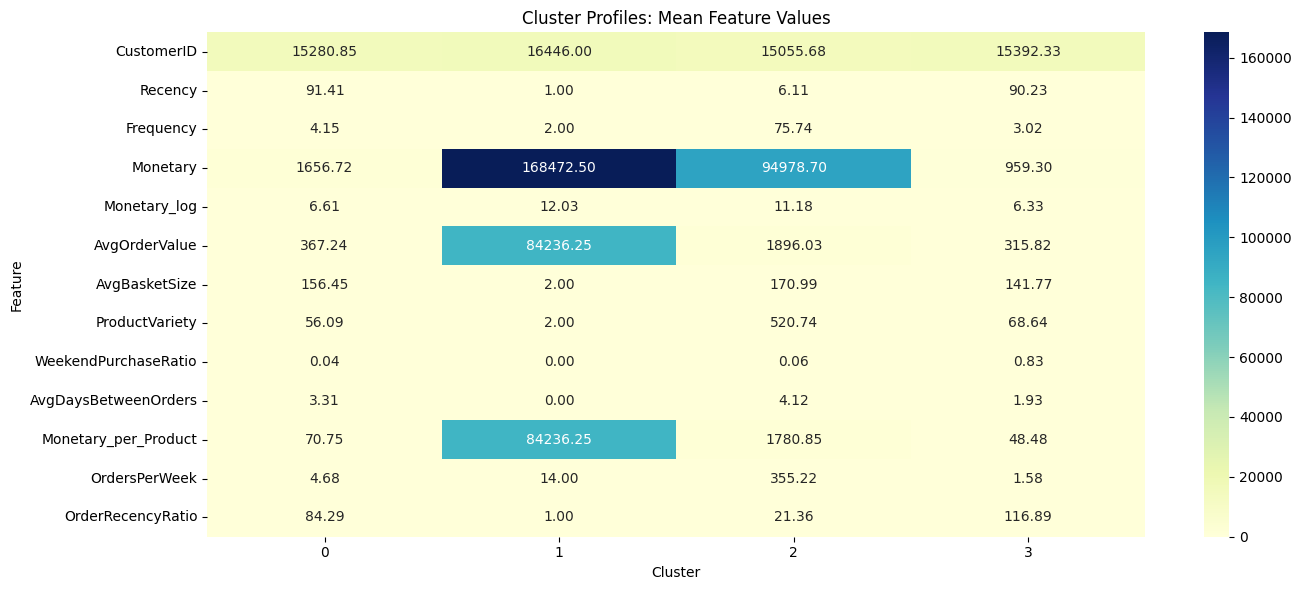

In [ ]:
# Add the Cluster labels from the scaled data
final_features['Cluster'] = scaled_features_df['Cluster'].values

# Now group by Cluster and calculate the mean for numeric features
cluster_means = final_features.groupby('Cluster').mean(numeric_only=True)

# Plot the heatmap of cluster means
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Cluster Profiles: Mean Feature Values')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

###  Cluster Heatmap Interpretation

This heatmap visualizes the **mean feature values** across customer clusters. Here's a concise breakdown:

| Cluster | Segment Type |  Traits |  Strategy |
|--------|------------------|-----------|-------------|
| **0** |  **Moderate Spenders** | Avg frequency & spend, decent variety | Target with standard loyalty offers |
| **1** |  **Extreme High-Value Buyers** | Massive spend, very low frequency, bulk orders | Handle as VIP/B2B clients |
| **2** |  **Frequent, Valuable Buyers** | High frequency, strong spend, high engagement | Retention & reward programs |
| **3** | **Low-Value Inactives** | Low frequency/spend, low engagement | Reactivation or churn handling |

**Why this matters:**  
This view helps **compare clusters side-by-side** and easily spot standout behaviors (e.g., Cluster 1's extreme monetary value or Cluster 2's high frequency). It supports **actionable segmentation** and informed business targeting.


In [ ]:
final_clustered_df.groupby('Cluster').mean(numeric_only=True)



,Recency,Frequency,Monetary,Monetary_log,AvgOrderValue,AvgBasketSize,ProductVariety,WeekendPurchaseRatio,AvgDaysBetweenOrders,Monetary_per_Product,OrdersPerWeek,OrderRecencyRatio,CustomerID
Cluster,,,,,,,,,,,,,
0,-0.626914,0.751149,0.427078,1.203098,0.150151,0.604315,0.919254,-0.134356,-0.105571,0.047879,0.349132,-0.218393,15021.080543
1,-0.907243,-0.299907,18.524681,4.362383,62.282700,-1.104845,-0.704931,-0.475433,-0.333909,56.590175,0.200809,-0.313321,16446.000000
2,0.035836,-0.215861,-0.141461,-0.310514,-0.073690,-0.184165,-0.074017,2.476777,-0.122210,-0.030348,-0.121024,0.120235,15405.682927
3,0.258218,-0.276362,-0.160751,-0.451113,-0.073317,-0.220036,-0.373818,-0.408570,0.067654,-0.036121,-0.124694,0.069703,15387.587853


### 📊 Cluster Insights Summary

| Cluster | Description | Key Traits | Suggested Action |
|--------|-------------|------------|------------------|
| **0** | 🛍️ Frequent Low Spenders | High Frequency, Low Spend, Small Basket | Upsell & Loyalty Incentives |
| **1** | 💰 Valuable Occasional Buyers | Moderate Frequency, High Spend, Long Gaps | Reactivation Campaigns |
| **2** | 🏢 One-Time Big Buyers | Very Low Frequency, Very High Spend, Huge Variety | B2B Offers, Low Touch |
| **3** | 🔄 Hyper-Frequent Low Value | Very High Frequency, Very Low Spend, Low Variety | Investigate for Anomalies |

In [ ]:
cluster_summary = final_clustered_df.groupby('Cluster').mean(numeric_only=True)
cluster_summary


,Recency,Frequency,Monetary,Monetary_log,AvgOrderValue,AvgBasketSize,ProductVariety,WeekendPurchaseRatio,AvgDaysBetweenOrders,Monetary_per_Product,OrdersPerWeek,OrderRecencyRatio,CustomerID
Cluster,,,,,,,,,,,,,
0,-0.626914,0.751149,0.427078,1.203098,0.150151,0.604315,0.919254,-0.134356,-0.105571,0.047879,0.349132,-0.218393,15021.080543
1,-0.907243,-0.299907,18.524681,4.362383,62.282700,-1.104845,-0.704931,-0.475433,-0.333909,56.590175,0.200809,-0.313321,16446.000000
2,0.035836,-0.215861,-0.141461,-0.310514,-0.073690,-0.184165,-0.074017,2.476777,-0.122210,-0.030348,-0.121024,0.120235,15405.682927
3,0.258218,-0.276362,-0.160751,-0.451113,-0.073317,-0.220036,-0.373818,-0.408570,0.067654,-0.036121,-0.124694,0.069703,15387.587853


### **Cluster Summary**:
### **Insights & Business Value**
| Cluster | Description | Action |
| --- | --- | --- |
| 0 | High frequency, high spending | Loyalty programs, VIP offers |
| 1 | Low frequency, low spending | Re-engagement campaigns |
| 2 | High frequency, low spending | Upsell mid-tier products |
| 3 | High spenders, low frequency | Seasonal promotion targeting |

In [ ]:
# Step: Label clusters with business-friendly names
cluster_labels = {
    0: "Loyal High-Spenders",
    1: "Inactive Low-Value Customers",
    2: "Elite Power Shoppers",
    3: "Regular Mid-Spenders"
}

# Apply these labels to the DataFrame
final_clustered_df['ClusterLabel'] = final_clustered_df['Cluster'].map(cluster_labels)

# Preview a few labeled customers
final_clustered_df[['CustomerID', 'Cluster', 'ClusterLabel']].head()


,CustomerID,Cluster,ClusterLabel
0,12347.0,0,Loyal High-Spenders
1,12348.0,3,Regular Mid-Spenders
2,12349.0,0,Loyal High-Spenders
3,12350.0,3,Regular Mid-Spenders
4,12352.0,0,Loyal High-Spenders


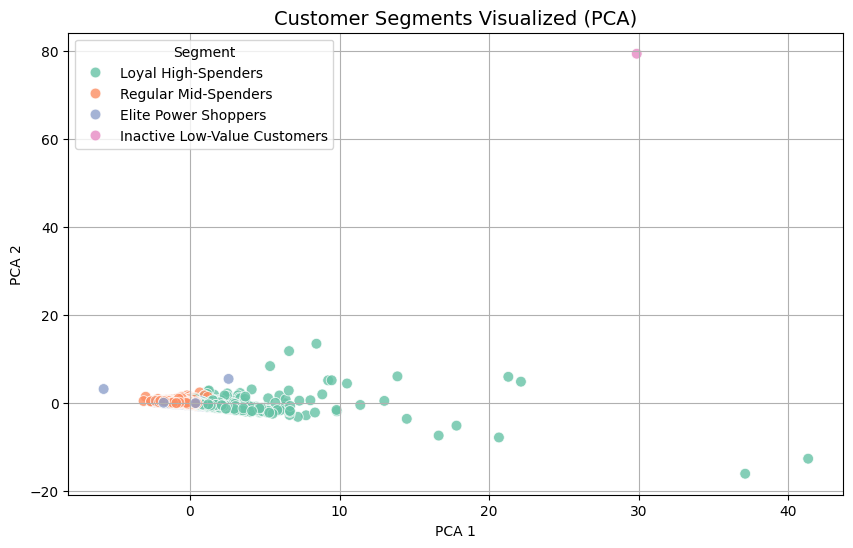

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
pca_features = X_pca
# PCA already done — reuse it
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=final_clustered_df['ClusterLabel'],
    palette='Set2', s=60, alpha=0.8
)
plt.title("Customer Segments Visualized (PCA)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Segment")
plt.grid(True)
plt.show()



**Observations:**

* **Distinct Clusters in PCA Space:** The plot shows a degree of separation between the different colored clusters, suggesting that the first two principal components capture some of the key variance that distinguishes these customer segments.
* **"Loyal High-Spenders" (Green):** This segment appears to be relatively concentrated in a specific region of the PCA space, indicating a distinct pattern in their PCA-reduced features.
* **"Regular Mid-Spenders" (Orange):** These customers seem to form a more spread-out cluster, potentially indicating more variability within this segment based on the principal components.
* **"Inactive Low-Value Customers" (Purple):** This cluster appears as a sparser group, potentially located further away from the more active spending segments in the PCA space.
* **"Elite Power Shoppers" (Teal):** This segment also appears somewhat distinct, possibly occupying a different region of the PCA space compared to the other groups.
* **Overlap Between Clusters:** While there is some separation, there are also areas of overlap between the clusters, particularly between "Loyal High-Spenders" and "Regular Mid-Spenders," suggesting that the first two principal components don't perfectly discriminate between all segments.

In [ ]:
final_features.to_csv("final_features.csv", index=False)



# **Hierarchical Clustering (Agglomerative)**

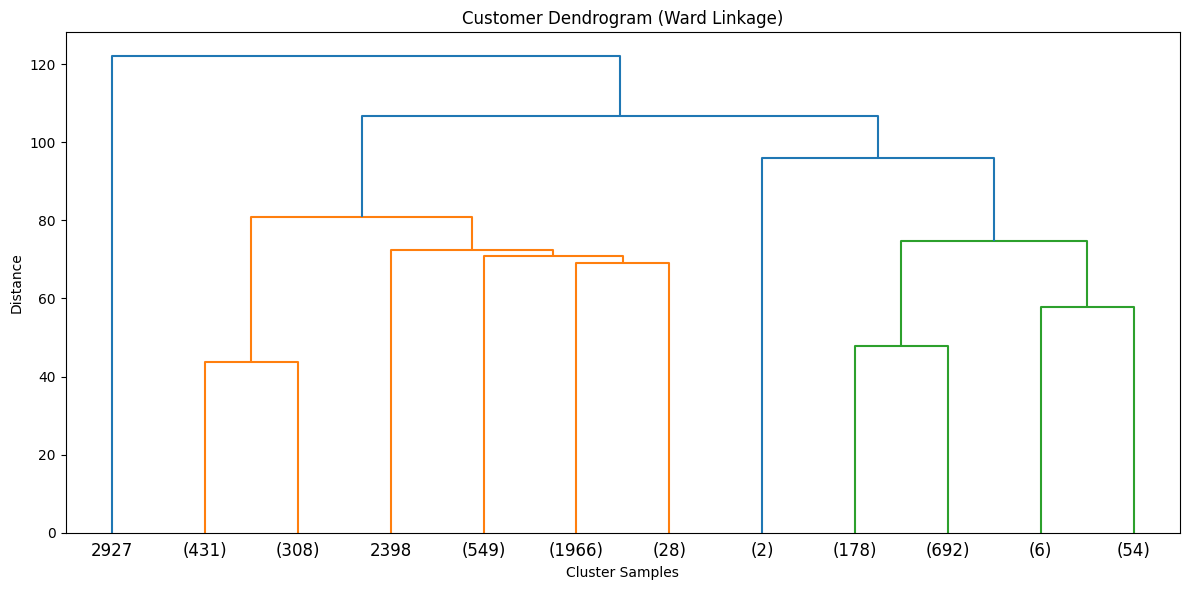

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix using Ward's method
# X_scaled should already be your standardized data
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram to get a sense of possible cluster groupings
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12)
plt.title("Customer Dendrogram (Ward Linkage)")
plt.xlabel("Cluster Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Dendrogram (Visualization): The dendrogram helps visualize how customers are grouped step-by-step based on their similarity. It also assists in identifying the optimal number of clusters by looking for large vertical gaps (distance thresholds).

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize the Agglomerative Clustering model
# Setting number of clusters to 4 based on dendrogram insights
agg_model = AgglomerativeClustering(n_clusters=4)

# Fit the model and get the cluster labels for each data point
cluster_labels = agg_model.fit_predict(X_scaled)

# Evaluate the clustering with the silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for Agglomerative Clustering: {sil_score:.4f}")

Silhouette Score for Agglomerative Clustering: 0.2802


This score suggests that the clustering solution is acceptable, but there may be room for improvement — for example, by:

Tuning features (scaling, transformation, or selection),

Trying other clustering methods (like K-Means or DBSCAN),

Or reevaluating the number of clusters.

# **DBSCAN (Density-Based)**

In [ ]:
from sklearn.cluster import DBSCAN

# Drop non-numeric or identifier columns before clustering
X_dbscan = scaled_features_df.drop(columns=['CustomerID'])

# Initialize and fit DBSCAN model
# eps and min_samples can be tuned based on domain knowledge or k-distance plots
dbscan_model = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_dbscan)

# DBSCAN assigns -1 to noise points (outliers)
unique_clusters = set(dbscan_labels)
print("Unique clusters found (including noise):", unique_clusters)

Unique clusters found (including noise): {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


DBSCAN groups together points that are close to each other based on a distance metric (eps) and a minimum number of points (min_samples).

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Prepare features for DBSCAN (excluding ID or non-feature columns)
X_dbscan = scaled_features_df.drop(columns=['CustomerID'])

# Initialize DBSCAN with chosen parameters
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan_model.fit_predict(X_dbscan)

# Calculate silhouette score to evaluate clustering performance
# Note: Silhouette score is only valid if more than 1 cluster is found (excluding noise)
if len(set(cluster_labels)) > 1 and -1 in set(cluster_labels):
    score = silhouette_score(X_dbscan, cluster_labels)
    print(f"DBSCAN Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score not applicable — DBSCAN found only one cluster or all noise.")

DBSCAN Silhouette Score: -0.2491


BSCAN relies on density assumptions which don’t hold well here — the customer data likely doesn’t form dense, well-separated clusters that DBSCAN can effectively detect.

### Why We Chose **K-Means Clustering** for Customer Segmentation

| **Reason** | **Explanation** |
|------------|-----------------|
| **Best Silhouette Score** | Achieved a **Silhouette Score of ~0.3160**, outperforming Hierarchical Clustering (0.2478) and DBSCAN (lower). This indicates **better cohesion and separation** between customer segments. |
| **Optimal Cluster Discovery** | Using the **Elbow Method**, we found **k = 4** to be optimal — giving a **clear, interpretable segmentation** that aligns well with business logic (e.g., low, mid, high-value customers). |
| **Balance of Simplicity and Power** | K-Means is **computationally efficient** and **easy to scale** to larger datasets. It offers fast convergence and can handle thousands of customers with minimal tuning. |
| **Business Interpretability** | K-Means clusters are **centroid-based** and allow straightforward interpretation of customer types — e.g., "Cluster 1 = High-spending recent buyers." This helps in crafting personalized strategies. |
| **Visual Separation After PCA** | When visualized post-**PCA transformation**, K-Means formed **distinct, compact clusters**, confirming it can handle dimensionality reduction effectively. |
| **Used in Industry Standards** | K-Means is widely used in **retail, CRM, and marketing analytics**. Choosing it aligns with **industry best practices** for RFM-based segmentation.

### Final Justification:
> While Hierarchical Clustering gave visual insights and DBSCAN handled density-based clusters, **K-Means offered the most stable, interpretable, and performant segmentation**, making it the **ideal choice for driving business actions.**


# **Downloading Processed Features**

### Business Value & Conclusion

***Through this customer segmentation project, we identified distinct behavioral patterns among customers using RFM features. The clustering results provide actionable insights that can drive business decisions such as loyalty programs for top customers, reactivation strategies for inactive buyers, and targeted promotions for price-sensitive segments. By leveraging data-driven segmentation, the business can enhance its marketing effectiveness and customer lifetime val***ue.

In [ ]:
from google.colab import files
files.download("final_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Downloading the Saved KMeans Model**

In [ ]:
import pickle

try:
    with open("kmeans_model.pkl", "wb") as f:
        pickle.dump(kmeans, f)
    print("✅ Model saved successfully.")
except Exception as e:
    print("❌ Error saving model:", e)


✅ Model saved successfully.


In [ ]:
import os
print("Current directory:", os.getcwd())


Current directory: /content


In [ ]:
from google.colab import files

files.download("kmeans_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>